In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Source of data base
https://github.com/Shomona/Bank-Failure-Prediction/blob/master/Bank%20failure%20data.xlsx

In [2]:
# Load the dataset
df = pd.read_excel("/content/Bank failure data (2).xlsx")

In [3]:
#understanding data set
df.shape

(4060, 14)

In [5]:
# Check variable data types
df.dtypes

Bank Name                          object
Quarter                            object
Tier One                          float64
Texas                             float64
Size                              float64
Brokered Deposits                 float64
Net Chargeoffs                    float64
Constr and Land Dev Loans         float64
Change in Portfolio Mix           float64
NP CRE to Assets                  float64
Volatile Liabilities to Assets    float64
Securities                        float64
Failed during 2010Q2               object
Cert Number                         int64
dtype: object

In [6]:
#Preprocess the data
# Encode categorical variables
label_encoder = LabelEncoder()
df['Bank Name'] = label_encoder.fit_transform(df['Bank Name'])
df['Quarter'] = label_encoder.fit_transform(df['Quarter'])
df['Failed during 2010Q2'] = label_encoder.fit_transform(df['Failed during 2010Q2'])


In [7]:
#checking for missing values
df.isnull().sum()

Bank Name                          0
Quarter                            0
Tier One                           0
Texas                             63
Size                               0
Brokered Deposits                 20
Net Chargeoffs                     6
Constr and Land Dev Loans          0
Change in Portfolio Mix            0
NP CRE to Assets                   0
Volatile Liabilities to Assets     0
Securities                         0
Failed during 2010Q2               0
Cert Number                        0
dtype: int64

In [8]:
# Handle missing values
df.fillna(0, inplace=True)


In [9]:
# Split features and target variable
X = df.drop(columns=['Failed during 2010Q2'])
y = df['Failed during 2010Q2']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Build the neural network model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

In [13]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [14]:

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=128, validation_split=0.1)



Epoch 1/50
23/23 [==============================] - 2s 25ms/step - loss: 0.5315 - accuracy: 0.7889 - val_loss: 0.3326 - val_accuracy: 0.8954
Epoch 2/50
23/23 [==============================] - 0s 13ms/step - loss: 0.3054 - accuracy: 0.9046 - val_loss: 0.2198 - val_accuracy: 0.9262
Epoch 3/50
23/23 [==============================] - 0s 11ms/step - loss: 0.2459 - accuracy: 0.9141 - val_loss: 0.1860 - val_accuracy: 0.9231
Epoch 4/50
23/23 [==============================] - 0s 8ms/step - loss: 0.2133 - accuracy: 0.9182 - val_loss: 0.1714 - val_accuracy: 0.9231
Epoch 5/50
23/23 [==============================] - 0s 7ms/step - loss: 0.1930 - accuracy: 0.9282 - val_loss: 0.1629 - val_accuracy: 0.9262
Epoch 6/50
23/23 [==============================] - 0s 10ms/step - loss: 0.1957 - accuracy: 0.9206 - val_loss: 0.1571 - val_accuracy: 0.9385
Epoch 7/50
23/23 [==============================] - 0s 7ms/step - loss: 0.1898 - accuracy: 0.9203 - val_loss: 0.1529 - val_accuracy: 0.9415
Epoch 8/50
23/23

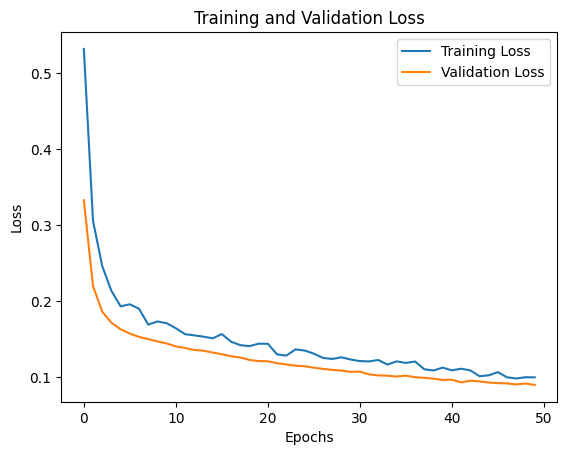

In [16]:
# Plot training and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

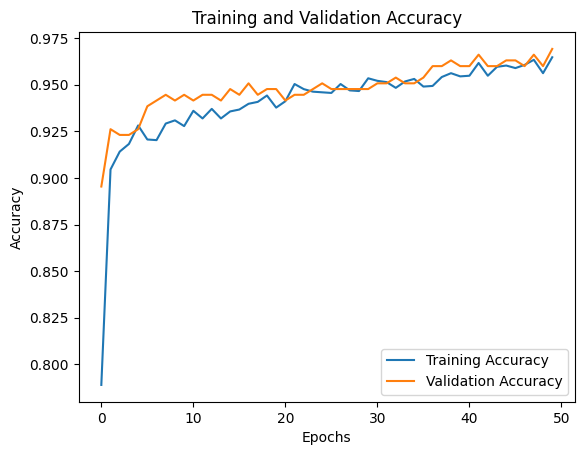

In [17]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [15]:

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", accuracy)

26/26 [==============================] - 0s 2ms/step - loss: 0.0965 - accuracy: 0.9692
Test Accuracy: 0.9692118167877197
